# First steps in  *pandas*

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr> , adapted from the notebook by Joris Van den Bossche:
https://github.com/jorisvandenbossche/pandas-tutorial/blob/master/01-pandas_introduction.ipynb

<a id="intro"> </a>

# Introduction et présentation

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 8

## Cas 1: Survie sur le Titanic 

In [9]:
from download import download

url = "http://josephsalmon.eu/enseignement/datasets/titanic.csv"
path_target = "./titanic.csv"
download(url, path_target, replace=False)

# df: data frame
df_titanic_raw = pd.read_csv("titanic.csv")

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [10]:
df_titanic_raw.tail(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Valeurs manquantes:
Pour faciliter la suite on ne garde que les observations qui sont complètes, on enlève donc ici les valeurs manquantes

In [11]:
df_titanic = df_titanic_raw.dropna()
df_titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Description succinte des variables:
- Survival - Survie (0 = Non; 1 = Oui).
- Pclass - Passenger Class / Classe du passager (1 = 1ere; 2 = 2nde; 3 = 3ème)
- Name - Nom
- Sex - Sexe
- Age - Age
- Sibsp - Nombre de frères / soeurs / maris / épouses à bord
- Parch - Nombre de parents ascendants / enfants à bord
- Ticket - Numéro du ticket
- Fare - Prix du ticket (British pound)
- Cabin - Cabine
- Embarked - Port d'embarquation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Descriptif rapide:
- count - effectif
- mean - moyenne
- std (**st**andard **d**eviation - écart-type)


In [12]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## Compréhension visualisation de la base de données:

**Quelle est la répartition par âge des passagers?**

<IPython.core.display.Javascript object>


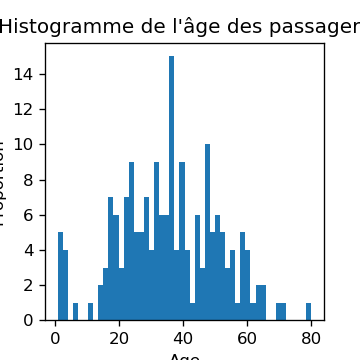

Text(0.5, 1.0, "Histogramme de l'âge des passagers")

In [16]:
plt.figure(figsize=(3,3))
plt.hist(df_titanic['Age'], density=False,bins=50)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title("Histogramme de l'âge des passagers")

<IPython.core.display.Javascript object>


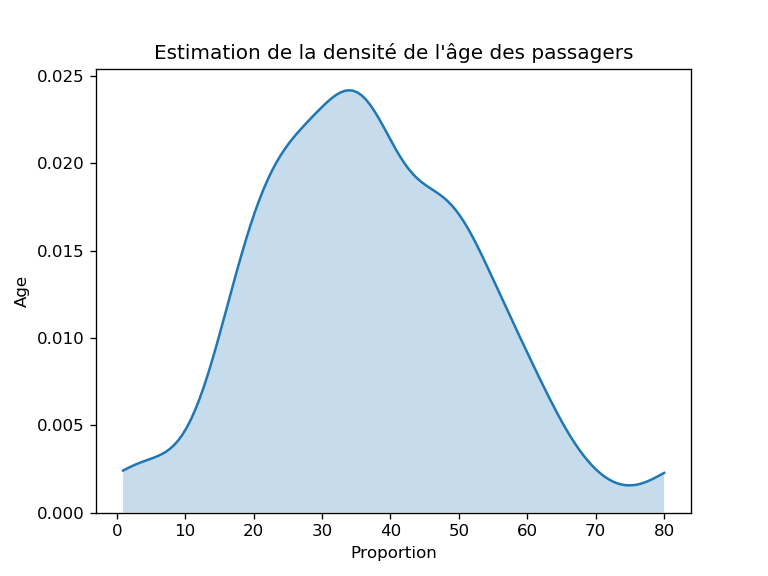

Text(0.5, 1.0, "Estimation de la densité de l'âge des passagers")

In [21]:
plt.figure()
ax = sns.kdeplot(df_titanic['Age'], shade=True, cut=0,bw=5)
plt.xlabel('Proportion')
plt.ylabel('Age')
ax.legend().set_visible(False)
plt.title("Estimation de la densité de l'âge des passagers")

In [22]:
ax = sns.kdeplot

** Comment le taux de survie des passagers diffère-t-il entre les sexes?**

In [23]:
df_titanic_raw.groupby('Sex')[['Survived']].aggregate(lambda x: x.mean())

,Survived
Sex,
female,0.742038
male,0.188908


** Ou en quoi diffère-t-il entre les différentes classes? **

In [ ]:
df_titanic.columns

In [ ]:
plt.figure()
df_titanic.groupby('Pclass')['Survived'].aggregate(lambda x: x.mean()).plot(kind='bar')


In [ ]:
sns.catplot(x=df_titanic_raw.columns[2], y="Age",
            hue="Sex", data=df_titanic_raw, kind="violin", legend=False)
plt.title("Taux de survie par classe")
plt.legend?
plt.tight_layout()

## Cas 2:  qualité de l'air

In [ ]:
url = "http://josephsalmon.eu/enseignement/datasets/20080421_20160927-PA13_auto.csv"
path_target = "./20080421_20160927-PA13_auto.csv"
download(url, path_target, replace=False)

# Traitement des données temporelles et dates: 
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [ ]:
polution_df = pd.read_csv('20080421_20160927-PA13_auto.csv', sep=';',
                          comment='#', na_values="n/d",
                          converters={'heure': str})
# check issues with 24:00:
# https://www.tutorialspoint.com/python/time_strptime.htm


# Pré-traitement:
polution_df['heure'] = polution_df['heure'].replace('24', '0')
time_improved = pd.to_datetime(polution_df['date'] +
                               ' ' + polution_df['heure'] + ':00',
                               format='%d/%m/%Y %H:%M')

polution_df['DateTime'] = time_improved
del polution_df['heure']
del polution_df['date']

polution_ts = polution_df.set_index(['DateTime'])
polution_ts = polution_ts.sort_index()
polution_ts.head()

In [ ]:
## Pollution sur Paris au cours des années, Source: Airparif
polution_ts.describe()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

axes[0].plot(polution_ts['O3'].resample('D').mean())
axes[0].set_title("Polution à l'ozone: moyenne journalière sur Paris")
axes[0].set_ylabel("Concentration (µg/m³)")

axes[1].plot(polution_ts['NO2'].resample('D').mean())
axes[1].set_title("Polution à l'azote: moyenne journalière sur Paris")
axes[1].set_ylabel("Concentration (µg/m³)")

plt.show()

** La pollution atmosphérique montre-t-elle une tendance à la baisse au fil des ans?**

In [ ]:
ax = polution_ts['2008':].resample('A').mean().plot(figsize=(4,4))  # échantillone par année (A pour Annual)
plt.ylim(0,50)
plt.title("Evolution de la pollution: \n moyenne annuelle sur Paris")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Années")

In [ ]:
# Chargement des couleurs
sns.set_palette("GnBu_d", n_colors=7)
polution_ts['weekday'] = polution_ts.index.weekday  # Monday=0, Sunday=6

# polution_ts['weekend'] = polution_ts['weekday'].isin([5, 6])

days = ['Lundi', 'Mardi', 'Mercredi',
        'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

polution_week_no2 = polution_ts.groupby(['weekday', polution_ts.index.hour])[
    'NO2'].mean().unstack(level=0)
polution_week_03 = polution_ts.groupby(['weekday', polution_ts.index.hour])[
    'O3'].mean().unstack(level=0)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

polution_week_no2.plot(ax=axes[0])
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].set_xlabel("Heure de la journée")
axes[0].set_title(
    "Profil journalier de la pollution au NO2: effet du weekend?")
axes[0].set_xticks(np.arange(0, 24))
axes[0].set_xticklabels(np.arange(0, 24), rotation=45)
axes[0].set_ylim(0, 60)

polution_week_03.plot(ax=axes[1])
axes[1].set_ylabel("Concentration (µg/m³)")
axes[1].set_xlabel("Heure de la journée")
axes[1].set_title("Profil journalier de la pollution au O3: effet du weekend?")
axes[1].set_xticks(np.arange(0, 24))
axes[1].set_xticklabels(np.arange(0, 24), rotation=45)
axes[1].set_ylim(0, 70)
axes[0].legend().set_visible(False)
# ax.legend()
axes[1].legend(labels=days, loc='lower left', bbox_to_anchor=(1, 0.1))

plt.tight_layout()

In [ ]:
# XXX TODO quid des saisons?

In [ ]:
import calendar
polution_ts['month'] = polution_ts.index.month  # Janvier=0, .... Decembre=12
polution_ts['month'] = polution_ts['month'].apply(lambda x: calendar.month_abbr[x])
polution_ts.head()

In [ ]:
days = []

polution_month_no2 = polution_ts.groupby(['month', polution_ts.index.hour])[
    'NO2'].mean().unstack(level=0)
polution_month_03 = polution_ts.groupby(['month', polution_ts.index.hour])[
    'O3'].mean().unstack(level=0)

In [ ]:
sns.set_palette("GnBu_d", n_colors=12)

fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)

polution_month_no2.plot(ax=axes[0])
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].set_xlabel("Heure de la journée")
axes[0].set_title(
    "Profil journalier de la pollution au NO2: effet du weekend?")
axes[0].set_xticks(np.arange(0, 24))
axes[0].set_xticklabels(np.arange(0, 24), rotation=45)
axes[0].set_ylim(0, 90)

polution_month_03.plot(ax=axes[1])
axes[1].set_ylabel("Concentration (µg/m³)")
axes[1].set_xlabel("Heure de la journée")
axes[1].set_title("Profil journalier de la pollution au O3: effet du weekend?")
axes[1].set_xticks(np.arange(0, 24))
axes[1].set_xticklabels(np.arange(0, 24), rotation=45)
axes[1].set_ylim(0, 90)
axes[0].legend().set_visible(False)
# ax.legend()
axes[1].legend(labels=calendar.month_name[1:], loc='lower left', bbox_to_anchor=(1, 0.1))

plt.tight_layout()

# Pandas: anlayser des données avec Python 

Pour les travaux intensifs en données en Python, la bibliothèque Pandas est devenue essentielle.

Qu'est ce que pandas? C'est un environnement qui gère des Data Frame:

- Pandas peut gérer *Data Frame* des tableaux *numpy* avec des étiquettes pour les lignes et les colonnes, et permet une prise en charge des types de données hétérogènes.
- Pandas peut aussi être considéré comme le data.frame de R en Python.
- Puissant pour travailler avec les données manquantes, travailler avec des données chronologiques, pour lire et écrire vos données, pour remodeler, regrouper, fusionner vos données, ...

Documentation: http://pandas.pydata.org/pandas-docs/stable/

Quand a-t-on besoin de Pandas?
Quand on travaille avec des tableaux ou des structures de données(commme des dataframe R, SQL table, Excel, Spreadsheet, ...):

- Importer des données
- Nettoyer des données "sales" 
- Explorer et comprendre des données
- Traiter et preparer les données pour faire une analyse 
- Analyser les données (avec en plus scikit-learn, statsmodels,...)
<br/>
<br/>

**ATTENTION / LIMITES:**

Pandas est bon pour travailler avec des données hétérogènes et des tableaux 1D/2D, mais tous les types de données ne correspondent pas à ces structures!

Contre-exemples:
- Quand on travaille avec des données de type **array** (e.g. images):  utiliser *numpy*
- Pour des données multidimensionnelles étiquetées  (e.g. données de climat): voir [xarray](http://xarray.pydata.org/en/stable/)

# Les structures de données en pandas : DataFrame et Series

Un DataFrame est une structure de données tabulaire (un objet multidimensionnel pouvant contenir des données étiquetées) composé de lignes et de colonnes, semblable à une feuille de calcul, une table de base de données ou à l'objet data.frame de R. Vous pouvez le considérer comme plusieurs objets Series partageant le même index.

In [ ]:
df_titanic

In [ ]:
df_titanic.index

In [ ]:
df_titanic.columns

In [ ]:
df_titanic.dtypes

In [ ]:
df_titanic.info()

In [ ]:
# on voit que c'est la variable cabine qui n'est pas bien renseigné, suit après l'âge
df_titanic_raw.info()

In [ ]:
array_titanic = df_titanic.values  # c'est la liste de valeur /array associé
array_titanic

# Données uni-dimensionel : Series (une colonne d'un DataFrame)

Une Series est un support de base pour les données étiquetées unidimensionnelles.

In [ ]:
fare = df_titanic['Fare']

In [ ]:
fare

## Attributs de l'objet *Series*: indices et valeurs

In [ ]:
fare.values[:10]

In [ ]:
fare[6] # existe mais fare[0] provoque une erreur, car on l'a enlevé du dataFrame, comme valeur manquante.


Contrairement au tableau *numpy*, cet index peut être autre chose qu'un entier:

In [ ]:
df_titanic = df_titanic.set_index('Name')
df_titanic

In [ ]:
age = df_titanic['Age']
age['Behr, Mr. Karl Howell']

In [ ]:
age.mean()

In [ ]:
df_titanic[age <2]

In [ ]:
df_titanic_raw['Embarked'].value_counts()

In [ ]:
pd.options.display.max_rows = 70
df_titanic[df_titanic['Embarked']=='C']  # Les passagers montés à Cherbourg n'ont pas des noms gaulois...

In [ ]:
pd.options.display.max_rows = 8

In [ ]:
df_titanic_raw['Survived'].sum() / df_titanic_raw['Survived'].count()

In [ ]:
df_titanic['Survived'].mean()

** Quelle était la proportion de femmes sur le bateau? **

In [ ]:
df_titanic_raw.groupby(['Sex']).size() / df_titanic_raw['Sex'].count()

In [ ]:
df_titanic_raw.groupby(['Sex']).mean()

# Data import et export

Pandas supports nativement une large gamme de formats d'entrée / sortie:
- CSV, text
- SQL database
- Excel
- HDF5
- json
- html
- pickle
- sas, stata
- ...

In [ ]:
# pd.read_csv?

# Exploration

In [ ]:
df_titanic_raw.tail()

In [ ]:
df_titanic_raw.head()

In [ ]:
sns.set_palette("colorblind")
sns.catplot(x='Pclass',y='Age',hue='Survived',data=df_titanic_raw, kind="violin")

In [ ]:
df_titanic_raw.columns

# iloc

In [ ]:
df_titanic.iloc[0:2,1:8]

# loc

In [ ]:
df_titanic.loc['Bonnell, Miss. Elizabeth', 'Fare']

In [ ]:
df_titanic.loc['Bonnell, Miss. Elizabeth']

In [ ]:
df_titanic.loc['Bonnell, Miss. Elizabeth','Survived']= 100

In [ ]:
df_titanic.loc['Bonnell, Miss. Elizabeth']

In [ ]:
df_titanic.loc['Bonnell, Miss. Elizabeth','Survived']= 1  # On remet la valeur comme avant 

# L'opération group-by:

In [ ]:
df_titanic.groupby('Sex').mean()

In [ ]:
df_titanic_raw.groupby('Sex').mean()['Pclass']  # attention ici on prend toutes les données, meme les manquantes...

In [ ]:
df_titanic['AgeClass'] = pd.cut(df_titanic['Age'], bins=np.arange(0,90,10)) # créer des classes / découpes.

In [ ]:
df_titanic['AgeClass']